Reg No.: 200968008<br>
Name: Aaron Dsouza<br>
<h1><b>Representational Learning using Autoencoders</b></h1>

#Train an autoencoder to detect anomalies usingthe ECG5000 dataset

In [378]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

MetaData<br>
Here the Target Column indicates <br>
0 = anomaly<br>
1 = normal

In [379]:
path = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
df = pd.read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [381]:
print("Shape: "+str(df.shape))

Shape: (4998, 141)


**Separating the dataset into features and target**

In [382]:
feat = df.iloc[:,:-1]
feat

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [383]:
target = df.iloc[:,-1]
target

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4993    0.0
4994    0.0
4995    0.0
4996    0.0
4997    0.0
Name: 140, Length: 4998, dtype: float64

**Spliting the Data into Train and Test**

In [384]:
# Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(feat, target, test_size=0.2,random_state=22)

In [385]:
print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (3998, 140)
x_test shape: (1000, 140)


In [386]:
# Normalizing the x_train and x_test

# Initial Method was using MinMaxScaler for Normalization but it resulting it loss of important features
# scaler = MinMaxScaler(feature_range=(0,1))
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

min_val = tf.reduce_min(x_train)
max_val = tf.reduce_max(x_train)

x_train = (x_train - min_val) / (max_val - min_val)
x_test = (x_test - min_val) / (max_val - min_val)

**Spliting the Data futher into Normal and Anomaly**

In [387]:
# Spitting the data into Normal and Anomaly i.e, based on target
train_idx = y_train.astype(bool)
test_idx = y_test.astype(bool)

# Normal ECG
x_train_normal = x_train[train_idx] 
x_test_normal = x_test[test_idx]

# Anomaly ECG
x_train_anomaly = x_train[~train_idx]
x_test_anomaly = x_test[~test_idx]

**Visualizing Normal ECG**

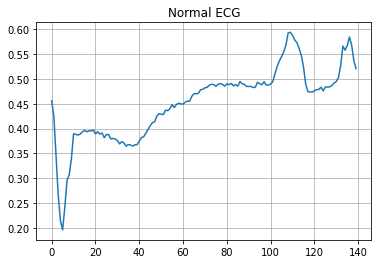

In [388]:
plt.grid()
plt.plot(np.arange(140), x_train_normal[0])
plt.title("Normal ECG")
plt.show()

**Visualizing Anomaly ECG**

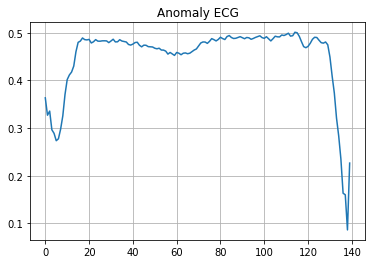

In [389]:
plt.grid()
plt.plot(np.arange(140), x_train_anomaly[2])
plt.title("Anomaly ECG")
plt.show()

**Building the Autoencoder Model**

In [425]:
from keras.models import Model
from keras.layers import Dense, Input, Flatten, Dropout

SIZE = 140
input = Input(shape=(SIZE), name='Input Layer')

enc1 = Dense(32, activation='relu', name='Encoder_1')(input)
drp = Dropout(0.1)(enc1)
enc2 = Dense(16, activation='relu', name='Encoder_2')(drp)
drp = Dropout(0.1)(enc2)
enc3 = Dense(8, activation='relu', name='Encoder_3')(drp)
drp = Dropout(0.1)(enc3)
dec1 = Dense(16, activation='relu', name='Decoder_1')(drp)
drp = Dropout(0.1)(dec1)
dec2 = Dense(32, activation='relu', name='Decoder_2')(drp)
drp = Dropout(0.1)(dec2)
dec3 = Dense(140, activation='sigmoid', name='Decoder_3')(drp)

autoencoder = Model(input,dec3)
opt = keras.optimizers.Adam(learning_rate=0.001);
autoencoder.compile(optimizer=opt, loss='mse',metrics=['mae']);


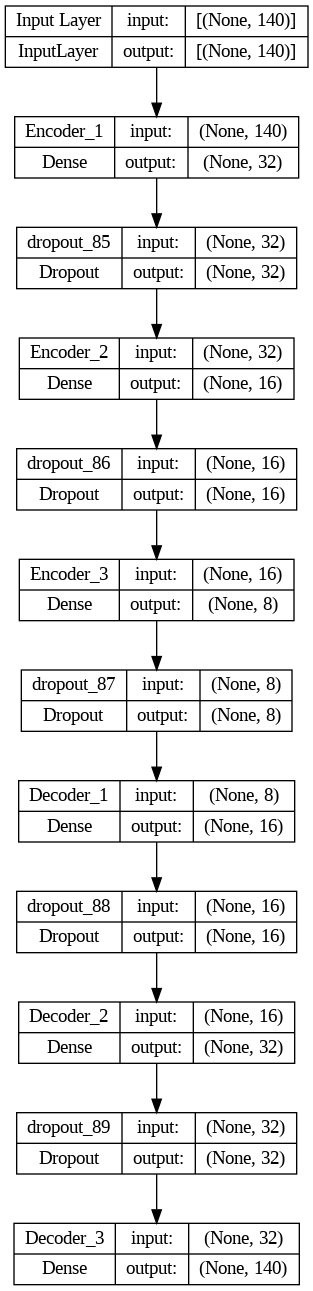

In [426]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [427]:
# Fitting the Model
history = autoencoder.fit(x_train_normal,
                          x_train_normal,
                          epochs=100,
                          batch_size = 256,
                          validation_data = (x_test_normal,x_test_normal),
                          shuffle=True
                          )

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.0079 - mae: 0.0640 - val_loss: 0.0075 - val_mae: 0.0611
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0073 - mae: 0.0602 - val_loss: 0.0070 - val_mae: 0.0580
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0066 - mae: 0.0560 - val_loss: 0.0059 - val_mae: 0.0513
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0054 - mae: 0.0492 - val_loss: 0.0041 - val_mae: 0.0405
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0041 - mae: 0.0420 - val_loss: 0.0030 - val_mae: 0.0314
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0032 - mae: 0.0362 - val_loss: 0.0023 - val_mae: 0.0273
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0026 - mae: 0.0334 - val_loss: 0.0019 - val_mae: 0.0260
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0022 - 

**Plotting Training Loss Vs Validation Loss**

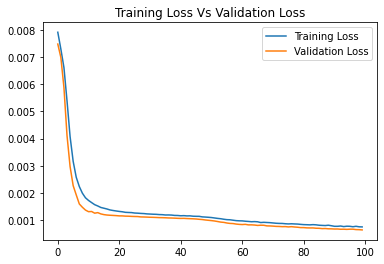

In [428]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

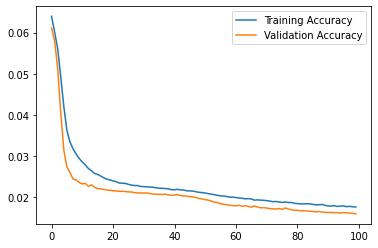

In [429]:
# Plotting Training MAE Vs Validation MAE
plt.plot(history.history["mae"], label="Training Accuracy")
plt.plot(history.history["val_mae"], label="Validation Accuracy")
plt.legend()
plt.show()

**Plotting the Reconstructed ECG for Normal and Anomaly and also visualizing the error**

In [451]:
encoder = Model(input,enc3)
decoder = Model(enc3,dec3)

encoded_normal = encoder(x_test_normal).numpy()
decoded_normal = decoder(encoded_normal).numpy()

encoded_anomaly = encoder(x_test_anomaly).numpy()
decoded_anomaly = decoder(encoded_anomaly).numpy()

Normal ECG

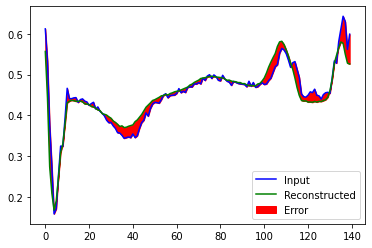

In [452]:
plt.plot(x_test_normal[0],'b')
plt.plot(decoded_normal[0],'g')
plt.fill_between(np.arange(140), decoded_normal[0], x_test_normal[0],color='red')
plt.legend(['Input','Reconstructed','Error'])
plt.show()

Anomaly ECG

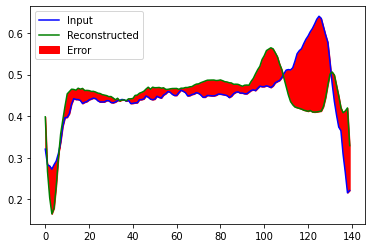

In [455]:
plt.plot(x_test_anomaly[0],'b')
plt.plot(decoded_anomaly[0],'g')
plt.fill_between(np.arange(140), decoded_anomaly[0], x_test_anomaly[0],color='red')
plt.legend(['Input','Reconstructed','Error'])
plt.show()

 **Train Error(MSE) Distribution**

52/52 [==============================] - 0s 1ms/step


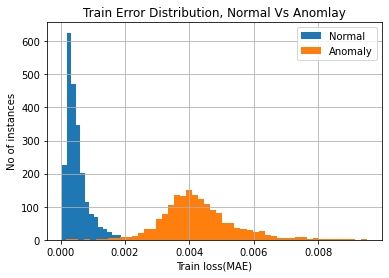

In [430]:
reconstructed_normal = autoencoder.predict(x_train_normal)
train_error_normal = keras.losses.mse(reconstructed_normal,x_train_normal)

reconstructed_anomaly = autoencoder.predict(x_train_anomaly)
train_error_anomaly = keras.losses.mse(reconstructed_anomaly,x_train_anomaly)

plt.hist(train_error_normal, bins=50)
plt.hist(train_error_anomaly, bins=50)
plt.title("Train Error Distribution, Normal Vs Anomlay")
plt.xlabel("Train loss(MAE)")
plt.ylabel("No of instances")
plt.grid()
plt.legend(['Normal','Anomaly'])
plt.show()

**Finding Threshold to Detect Anomaly in ECG Data**

In [431]:
# Calculating Train Error
reconstructed_normal = autoencoder.predict(x_train_normal)
train_error = keras.losses.mse(reconstructed_normal,x_train_normal)

# Calculating Threshold
threshold = np.mean(train_error)+np.std(train_error)
threshold

74/74 [==============================] - 0s 1ms/step


0.0011905163068426472

**Test Error(MSE) Distribution**

14/14 [==============================] - 0s 2ms/step


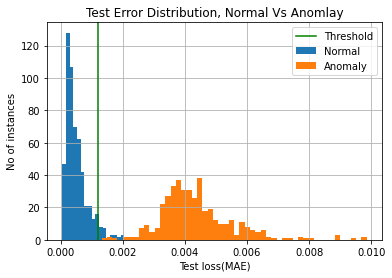

In [432]:
reconstructed_normal = autoencoder.predict(x_test_normal)
test_error_normal = keras.losses.mse(reconstructed_normal,x_test_normal)

reconstructed_anomaly = autoencoder.predict(x_test_anomaly)
test_error_anomaly = keras.losses.mse(reconstructed_anomaly,x_test_anomaly)

plt.hist(test_error_normal, bins=50)
plt.hist(test_error_anomaly, bins=50)
plt.axvline(threshold,c='g')
plt.title("Test Error Distribution, Normal Vs Anomlay")
plt.xlabel("Test loss(MAE)")
plt.ylabel("No of instances")
plt.grid()
plt.legend(['Threshold','Normal','Anomaly'])
plt.show()

**Evaluating the Model Performance**

In [433]:
def find_prediction(model,test_data,threshold):
  test_pred = model.predict(test_data)
  test_error = keras.losses.mse(test_pred,test_data)
  return tf.math.less(test_error,threshold)

In [434]:
def evaluate(pred, label):
  print("Accuracy = "+str(accuracy_score(label,pred)))
  print("Precision = "+str(precision_score(label,pred)))
  print("Recall = "+str(recall_score(label,pred)))

In [435]:
pred = find_prediction(autoencoder,x_test,threshold)
evaluate(pred,y_test)

32/32 [==============================] - 0s 1ms/step
Accuracy = 0.943
Precision = 1.0
Recall = 0.9020618556701031


Key Observations:<br>
<ul>
<li>Use of MinMaxScaler results in the loss of Features which leads to poor Performance of the Model</li>
<li>Mean Squared Error(MSE) is slightly better than Mean Absolute Error (MAE) as a loss function</li>
<li>This Model is able to make predictions with 94% accuracy</li>
<li>More number of Epochs are required to improve the Model Performance
</ul>